<a href="https://colab.research.google.com/github/TayYuanGeng/SC3000/blob/main/Lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 1

## Installing dependencies:

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install 'gymnasium[classic_control]'
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install moviepy > /dev/null 2>&1

## Importing dependencies and define helper functions

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")

## Tutorial: Loading CartPole environment

In [ ]:
env = gym.make("CartPole-v1")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [ ]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity.

In [ ]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [ ]:
observation = env.reset()
print("Initial observations:", observation)

Initial observations: (array([ 0.045332  , -0.0266373 , -0.03965751,  0.0017187 ], dtype=float32), {})


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [ ]:
print(env.step(0))
observation, reward, done, _, info = env.step(0)
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)

(array([ 0.04479925, -0.22116873, -0.03962314,  0.28163016], dtype=float32), 1.0, False, False, {})
New observations after choosing action 0: [ 0.04037588 -0.41570374 -0.03399053  0.56155753]
Reward for this step: 1.0
Is this round done? False


Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [ ]:
observation = env.reset()
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, _, info = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 8.0


## Task 1: Development of an RL agent

An example of a naive agent is given below, which randomly chooses an action regardless of the observation:

In [ ]:
# def rand_policy_agent(observation):
#     return random.randint(0, 1)

In [ ]:
from collections import defaultdict

# Initialize Q-table
Q = defaultdict(lambda: np.zeros(env.action_space.n))
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration-exploitation trade-off

def epsilon_greedy_policy(state):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Store cumulative reward for the episode
episode_rewards = []

# Run 1 episode
state, _ = env.reset()
done = False
total_reward = 0

while not done:
    # Select action using epsilon-greedy policy
    action = epsilon_greedy_policy(state)

    # Take action in the environment
    next_state, reward, done, _, _ = env.step(action)

    # Accumulate the reward
    total_reward += reward

    # Q-learning update rule
    Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
    state = next_state

    # Append total reward at each step for visualization
    episode_rewards.append(total_reward)

For Task 1, we can show the observation and chosen action below:

In [ ]:
# observation = env.reset()
# action = rand_policy_agent(observation)
# print("Observation:", observation)
# print("Chosen action:", action)

## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

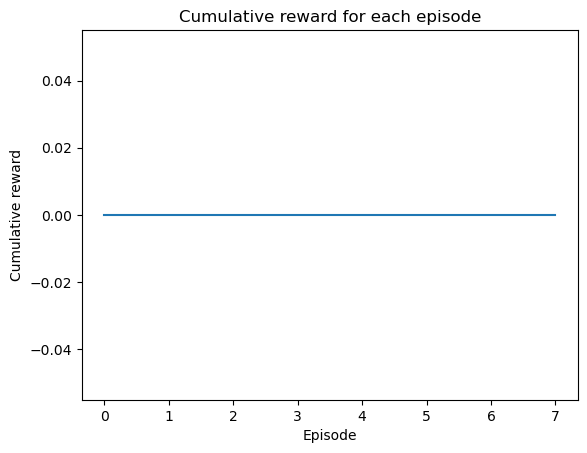

In [ ]:
# Plot the cumulative rewards
plt.plot(episode_rewards)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('Episode')
plt.show()

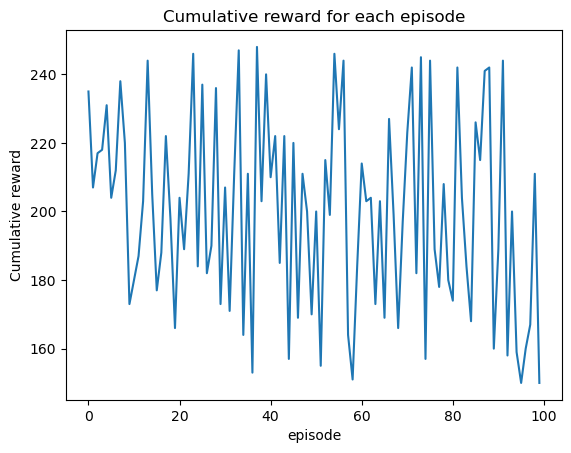

In [ ]:
# episode_results = np.random.randint(150, 250, size=100)
# plt.plot(episode_results)
# plt.title('Cumulative reward for each episode')
# plt.ylabel('Cumulative reward')
# plt.xlabel('episode')
# plt.show()

Print the average reward over the 100 episodes.

In [ ]:
print("Average cumulative reward:", episode_results.mean())
print("Is my agent good enough?", episode_results.mean() > 195)

Average cumulative reward: 200.27
Is my agent good enough? True


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [ ]:
import gym
from gym.wrappers import RecordVideo

# Define a random agent
def rand_policy_agent(observation):
    return np.random.choice([0, 1])

# Create environment with video recording
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = RecordVideo(env, "./video", episode_trigger=lambda episode_id: True)

observation, _ = env.reset()

while True:
    action = rand_policy_agent(observation)
    observation, reward, done, truncated, info = env.step(action)

    if done or truncated:
        break

env.close()

# Function to display video in Jupyter Notebook
from IPython.display import Video
import os

def show_video():
    video_path = "./video"
    video_files = [f for f in os.listdir(video_path) if f.endswith(".mp4")]

    if video_files:
        return Video(os.path.join(video_path, video_files[0]), embed=True)
    else:
        print("No video found.")

show_video()

MoviePy - Building video /Users/yuangeng/Downloads/Y2S2/SC3000 Artificial Intelligence/Lab 1/video/rl-video-episode-0.mp4.
MoviePy - Writing video /Users/yuangeng/Downloads/Y2S2/SC3000 Artificial Intelligence/Lab 1/video/rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Users/yuangeng/Downloads/Y2S2/SC3000 Artificial Intelligence/Lab 1/video/rl-video-episode-0.mp4
